In [1]:
import scipy
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import tensorflow as tf

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

%matplotlib inline 

In [2]:
tf.random.set_seed(456)

In [3]:
dataframe = pd.read_csv("AAPL_3Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (777, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.658726,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.426846,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,52.178062,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.972744,132314800
2018-10-22,54.947498,55.840000,54.735001,55.162498,53.296410,115168400
2018-10-23,53.957500,55.812500,53.674999,55.682499,53.798817,155071200
2018-10-24,55.650002,56.057499,53.634998,53.772499,51.953426,163702000
2018-10-25,54.427502,55.345001,54.187500,54.950001,53.091099,119423200
2018-10-26,53.974998,55.047501,53.167500,54.075001,52.245701,189033600


<function matplotlib.pyplot.show(close=None, block=None)>

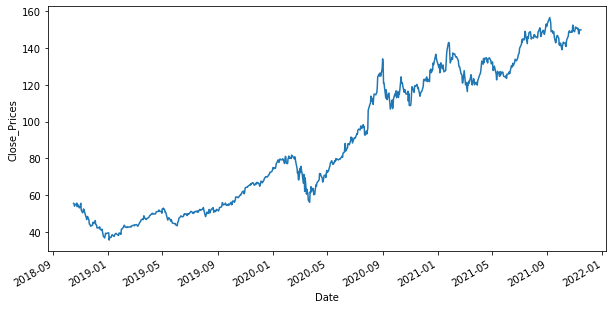

In [4]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

Dimension of train data:  (543, 6)
Dimension of test data:  (234, 6)


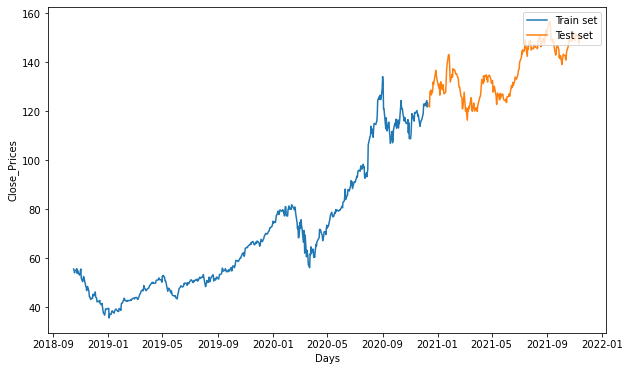

In [5]:
# Split train data and test data
training_size = int(len(dataframe)*0.7)
train_dataset, test_dataset = dataframe.iloc[:training_size], dataframe.iloc[training_size:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [6]:
#Split train data for X and Y
train_dataset = train_dataset.reset_index().drop('Date',axis = 1)

X_train = train_dataset[['Close']]
Y_train = train_dataset[['Close']]

#Split test data for X and Y
test_dataset = test_dataset.reset_index().drop('Date',axis = 1)

X_test = test_dataset[['Close']] 
Y_test = test_dataset[['Close']]

print(X_train)
print(Y_test)

          Close
0     55.537498
1     55.297501
2     54.005001
3     54.827499
4     55.162498
..          ...
538  122.250000
539  123.750000
540  124.379997
541  121.779999
542  123.239998

[543 rows x 1 columns]
          Close
0    122.410004
1    121.779999
2    127.879997
3    127.809998
4    128.699997
..          ...
229  150.809998
230  147.919998
231  147.869995
232  149.990005
233  150.000000

[234 rows x 1 columns]


In [7]:
#for normalization data
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(Y_train)

#Apply the scaler to training data
X_train_normalize = input_scaler.transform(X_train)
Y_train_normalize = output_scaler.transform(Y_train)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_test = scaler_x_test.fit(X_test)
output_scaler_test = scaler_y_test.fit(Y_test)

#Apply the scaler to test data
X_test_normalize = input_scaler_test.transform(X_test)
Y_test_normalize = output_scaler_test.transform(Y_test)



print('X_train_normalize.shape:', X_train_normalize.shape)
print('Y_train_normalize.shape:', Y_train_normalize.shape)
print('X_test_normalize.shape:', X_test_normalize.shape)
print('Y_test_normalize.shape:', Y_test_normalize.shape)

X_train_normalize.shape: (543, 1)
Y_train_normalize.shape: (543, 1)
X_test_normalize.shape: (234, 1)
Y_test_normalize.shape: (234, 1)


In [8]:
print('X_train_normalize:\n', X_train_normalize)
print('Y_train_normalize:\n', Y_train_normalize)
print('X_test_normalize:\n', X_test_normalize)
print('Y_test_normalize:\n', Y_test_normalize)

X_train_normalize:
 [[0.20267152]
 [0.20023827]
 [0.18713407]
 [0.19547309]
 [0.19886953]
 [0.20414163]
 [0.18477682]
 [0.19671509]
 [0.18784378]
 [0.17755305]
 [0.18023979]
 [0.1943325 ]
 [0.20284897]
 [0.16548804]
 [0.15055888]
 [0.15608447]
 [0.17174866]
 [0.16804807]
 [0.15785872]
 [0.13175171]
 [0.12683445]
 [0.11307126]
 [0.12475605]
 [0.13012952]
 [0.11068867]
 [0.08818086]
 [0.08767394]
 [0.07629329]
 [0.08219906]
 [0.08123591]
 [0.09821814]
 [0.09469496]
 [0.09223633]
 [0.10805264]
 [0.08744583]
 [0.08245254]
 [0.0666616 ]
 [0.06947509]
 [0.06701646]
 [0.06820776]
 [0.07289685]
 [0.05903225]
 [0.05512889]
 [0.06052773]
 [0.04739816]
 [0.03710744]
 [0.02164599]
 [0.01176082]
 [0.03796922]
 [0.03538385]
 [0.03558663]
 [0.03941399]
 [0.03987022]
 [0.        ]
 [0.01538538]
 [0.01454893]
 [0.02169669]
 [0.02818542]
 [0.02942742]
 [0.02560005]
 [0.0197957 ]
 [0.02757713]
 [0.03231694]
 [0.03464882]
 [0.03708211]
 [0.02816009]
 [0.02973157]
 [0.02663927]
 [0.03946466]
 [0.03576408]


In [9]:
# Create a 3D input 
def create_3D_dataset(dataset, time_steps=1):
    X_dataset = []
    Y_dataset = []
    for i in range (len(dataset) - time_steps):
        V = dataset[i:(i+time_steps),0]
        X_dataset.append(V)
        Y_dataset.append(dataset[i+time_steps,0])
    return np.array(X_dataset), np.array(Y_dataset)

time_Steps = 30

X_train, Y_train = create_3D_dataset(X_train_normalize, time_Steps)
X_test, Y_test = create_3D_dataset(X_test_normalize, time_Steps)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (513, 30)
Y_train.shape: (513,)
X_test.shape: (204, 30)
Y_test.shape: (204,)


In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))

print('Y_train.shape:', Y_train.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (513, 30, 1)
X_test.shape: (204, 30, 1)
Y_train.shape: (513, 1)
Y_test.shape: (204, 1)


In [11]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

def create_LSTM_model(units):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences=True,input_shape=[X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #Compile model
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

LSTM_model = create_LSTM_model(64)

In [12]:
# Fit LSTM
def fit_model(model):
    #early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    record = model.fit(X_train, Y_train, epochs = 200, validation_split = 0.2, batch_size = 64,
                      shuffle = False)
    return record

print("\n\nLSTM_record")
LSTM_record = fit_model(LSTM_model)



LSTM_record
Epoch 1/200
7/7 [==============================] - 5s 166ms/step - loss: 0.0060 - val_loss: 0.0047
Epoch 2/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0107 - val_loss: 0.0406
Epoch 3/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 4/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 5/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0020 - val_loss: 0.0075
Epoch 6/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 7/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0053 - val_loss: 0.0080
Epoch 8/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 9/200
7/7 [==============================] - 0s 30ms/step - loss: 0.0022 - val_loss: 0.0096
Epoch 10/200
7/7 [==============================] - 0s 29ms/step - loss: 0.0012 - val_loss: 0.0040
Epoc

Epoch 83/200
7/7 [==============================] - 0s 58ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 84/200
7/7 [==============================] - 0s 58ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 85/200
7/7 [==============================] - 0s 58ms/step - loss: 9.1134e-04 - val_loss: 0.0036
Epoch 86/200
7/7 [==============================] - 0s 56ms/step - loss: 8.1440e-04 - val_loss: 0.0027
Epoch 87/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 88/200
7/7 [==============================] - 0s 62ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 89/200
7/7 [==============================] - 0s 63ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 90/200
7/7 [==============================] - 0s 63ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 91/200
7/7 [==============================] - 0s 60ms/step - loss: 9.2611e-04 - val_loss: 0.0026
Epoch 92/200
7/7 [==============================] - 0s 59ms/step - loss: 8.1960e-04 - val_loss: 0

7/7 [==============================] - 0s 58ms/step - loss: 7.3732e-04 - val_loss: 0.0022
Epoch 163/200
7/7 [==============================] - 0s 57ms/step - loss: 6.7787e-04 - val_loss: 0.0022
Epoch 164/200
7/7 [==============================] - 0s 57ms/step - loss: 8.2917e-04 - val_loss: 0.0024
Epoch 165/200
7/7 [==============================] - 0s 59ms/step - loss: 8.2606e-04 - val_loss: 0.0021
Epoch 166/200
7/7 [==============================] - 0s 58ms/step - loss: 7.5732e-04 - val_loss: 0.0023
Epoch 167/200
7/7 [==============================] - 0s 61ms/step - loss: 8.3346e-04 - val_loss: 0.0023
Epoch 168/200
7/7 [==============================] - 0s 62ms/step - loss: 8.3298e-04 - val_loss: 0.0029
Epoch 169/200
7/7 [==============================] - 0s 62ms/step - loss: 7.0714e-04 - val_loss: 0.0021
Epoch 170/200
7/7 [==============================] - 0s 58ms/step - loss: 8.6527e-04 - val_loss: 0.0028
Epoch 171/200
7/7 [==============================] - 0s 58ms/step - loss: 7.41

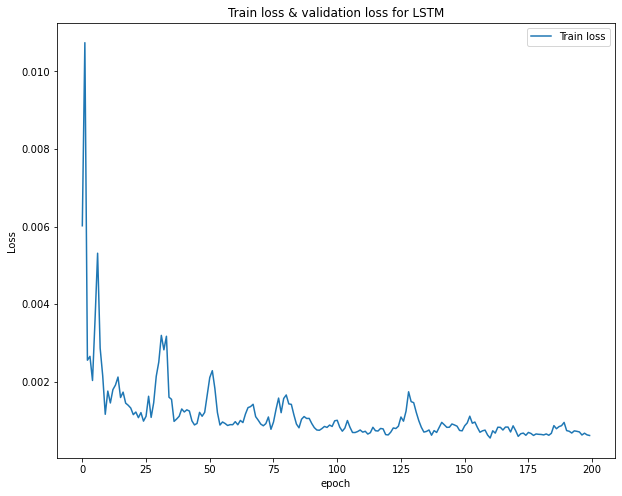

In [13]:
# Flot train loss and validation loss
def plot_loss (record,model_name):
    plt.figure(figsize = (10,8))
    plt.plot(record.history['loss'])
    #plt.plot(record.history['val_loss'])
    plt.title('Train loss & validation loss for '+ model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss','Validation Loss'], loc='upper right')
    
plot_loss(LSTM_record,'LSTM')

In [14]:
# Make Prediction
def predict(model):
    prediction = model.predict(X_test)
    prediction = scaler_x_test.inverse_transform(prediction)
    return prediction


prediction_of_LSTM = predict(LSTM_model)
prediction_of_LSTM.shape

(204, 1)

In [15]:
Y_test_read = scaler_x_test.inverse_transform(Y_test) 
Y_train_read = scaler_x.inverse_transform(Y_train)

print("Actual Value\n")
print(Y_test_read)
print("\nPrediction\n")
print(prediction_of_LSTM)

Actual Value

[[142.059998]
 [137.089996]
 [131.960007]
 [134.139999]
 [134.990005]
 [133.940002]
 [137.389999]
 [136.759995]
 [136.910004]
 [136.009995]
 [135.389999]
 [135.130005]
 [135.369995]
 [133.190002]
 [130.839996]
 [129.710007]
 [129.869995]
 [126.      ]
 [125.860001]
 [125.349998]
 [120.989998]
 [121.260002]
 [127.790001]
 [125.120003]
 [122.059998]
 [120.129997]
 [121.419998]
 [116.360001]
 [121.089996]
 [119.980003]
 [121.959999]
 [121.029999]
 [123.989998]
 [125.57    ]
 [124.760002]
 [120.529999]
 [119.989998]
 [123.389999]
 [122.540001]
 [120.089996]
 [120.589996]
 [121.209999]
 [121.389999]
 [119.900002]
 [122.150002]
 [123.      ]
 [125.900002]
 [126.209999]
 [127.900002]
 [130.360001]
 [133.      ]
 [131.240005]
 [134.429993]
 [132.029999]
 [134.5     ]
 [134.160004]
 [134.839996]
 [133.110001]
 [133.5     ]
 [131.940002]
 [134.320007]
 [134.720001]
 [134.389999]
 [133.580002]
 [133.479996]
 [131.460007]
 [132.539993]
 [127.849998]
 [128.100006]
 [129.740005]
 [130.

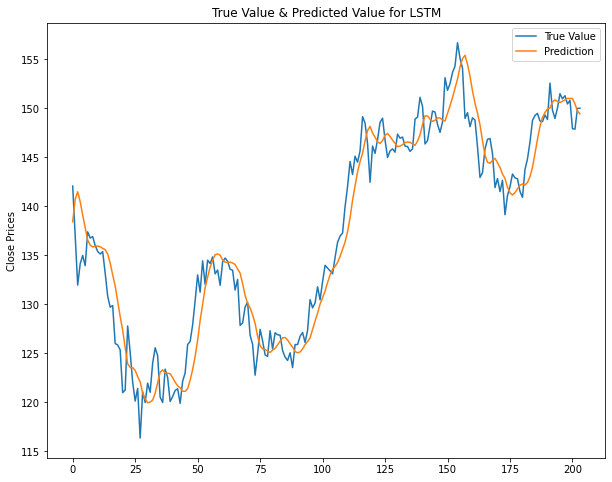

In [16]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
plot_result(prediction_of_LSTM, Y_test_read, 'LSTM')

In [17]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read, prediction_of_LSTM, "3-year",'Univariate LSTM') 

This prediction model is:Univariate LSTM
The size of dataset is:3-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 7.2350
Root Mean Square Error (RMSE) = 2.6898
Mean Absolute Error (MAE)     = 2.1117
+-----------------------------+--------+
